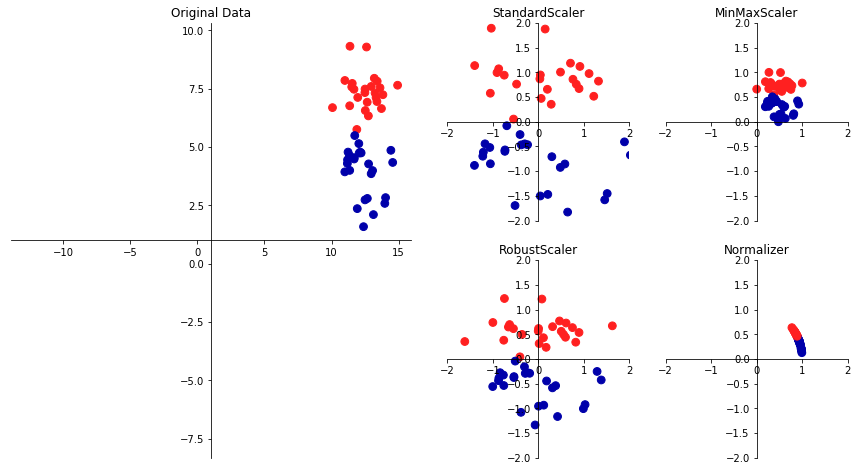

In [2]:
import mglearn

mglearn.plots.plot_scaling()  # 数据缩放
# StandardScaler确保每个特征平均值为0，方差为1，RoubustScaler类似表示中位数和四分位数，但会忽略异常值

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)  # 对缩放器调用fit只提供X_train,而不用y_train
# X_scaler = scaler.fit(X).transform(X)等价于X_scaler_d = scaler.fit_transform(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
X_train_scaler = scaler.transform(X_train)  # 变换数据
print('transformed shape:{}'.format(X_train_scaler.shape))
print('per-feature minimun before scaling:\n{}'.format(X_train.min(axis=0)))
print('per-feature maximun before scaling:\n{}'.format(X_train.max(axis=0)))
print('per-feature minimun after scaling:\n{}'.format(X_train_scaler.min(axis=0)))
print('per-feature maximun after scaling:\n{}'.format(X_train_scaler.max(axis=0)))

transformed shape:(426, 30)
per-feature minimun before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximun before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimun after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximun after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
X_test_scaler = scaler.transform(X_test)
print('per-feature minimun after scaling:\n{}'.format(X_test_scaler.min(axis=0)))  # trandform方法总是减去train set的min再除以train set的范围
print('per-feature maximun after scaling:\n{}'.format(X_test_scaler.max(axis=0)))

per-feature minimun after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximun after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [9]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print('test set score:\n{:.4f}'.format(svm.score(X_test, y_test)))  # 未进行数据缩放

test set score:
0.6294


c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
svm.fit(X_train_scaler, y_train)
print('test set score:\n{:.4f}'.format(svm.score(X_test_scaler, y_test)))  # 进行过数据缩放

test set score:
0.9650


c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [18]:
from sklearn.preprocessing import StandardScaler

sclaer = StandardScaler()
sclaer.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
svm.fit(X_train_scaler, y_train)
print('test set score:\n{:.4f}'.format(svm.score(X_test_scaler, y_test)))

test set score:
0.9650


c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


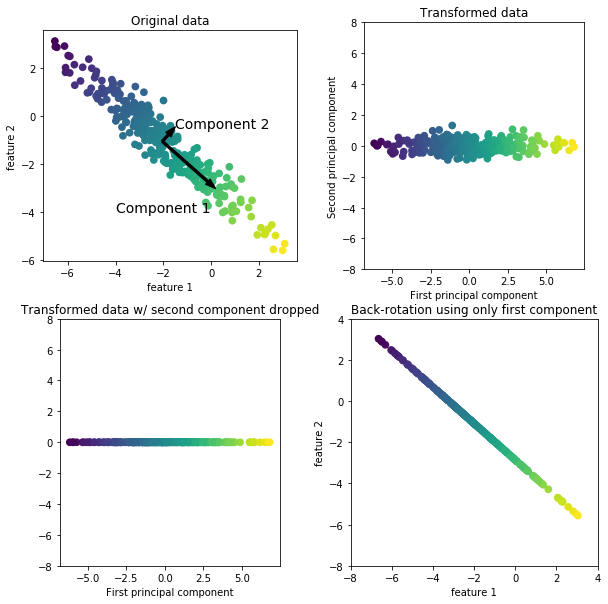

In [19]:
mglearn.plots.plot_pca_illustration()  # pca对一个二维数据集的作用  方差最大的方向为Component 1， 主成分的个数与原特征相同

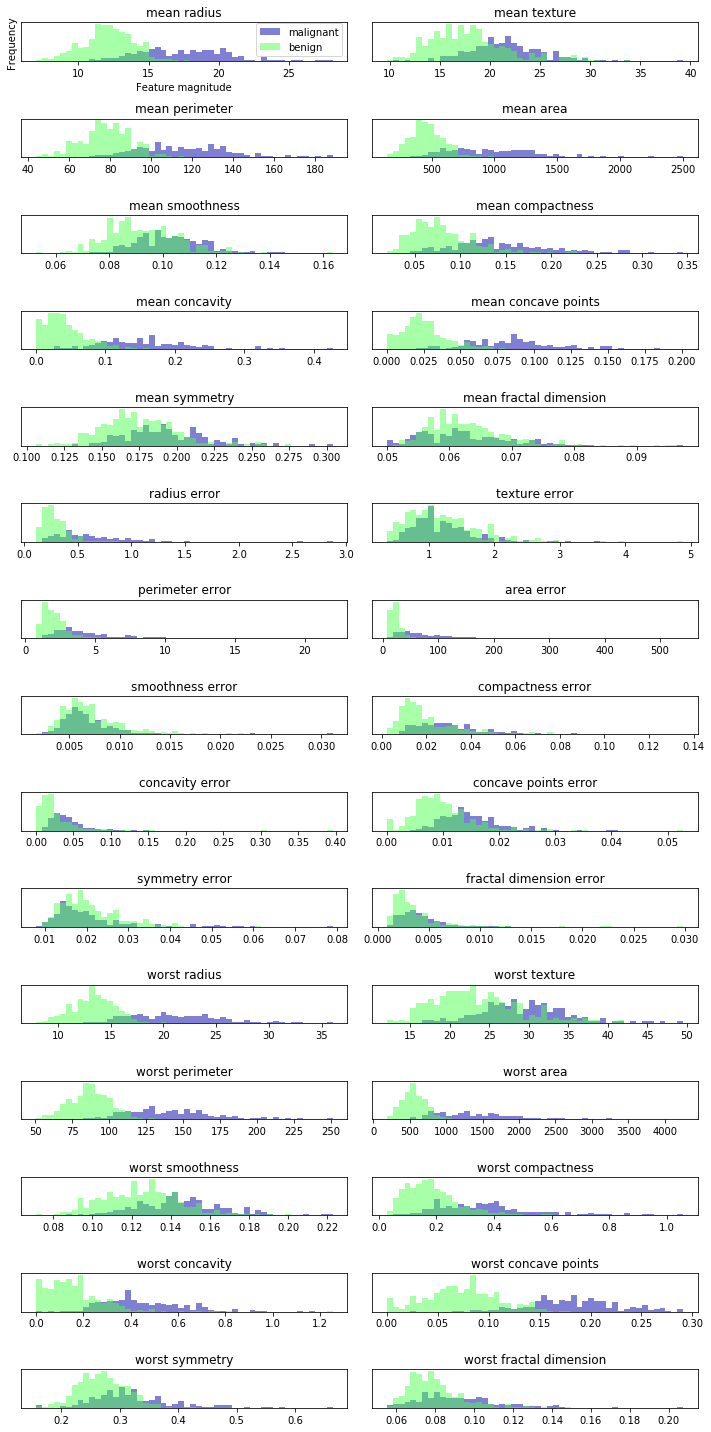

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

In [37]:
# PCA最常见的应用就是将高维数据集可视化和特征提取
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaler = scaler.transform(cancer.data)

In [51]:
from sklearn.decomposition import PCA  # 主成分分析
# from sklearn.decomposition import NMF  非负矩阵分解

pca = PCA(n_components=2)
pca.fit(X_scaler)

X_pca = pca.transform(X_scaler)
print('PCA component shape:{}'.format(pca.components_.shape))
print('Original shape:{}'.format(X_scaler.shape))
print('Reduced shape:{}'.format(X_pca.shape))
print('PCA component:\n{}'.format(pca.components_))

PCA component shape:(2, 30)
Original shape:(569, 30)
Reduced shape:(569, 2)
PCA component:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'second principal component')

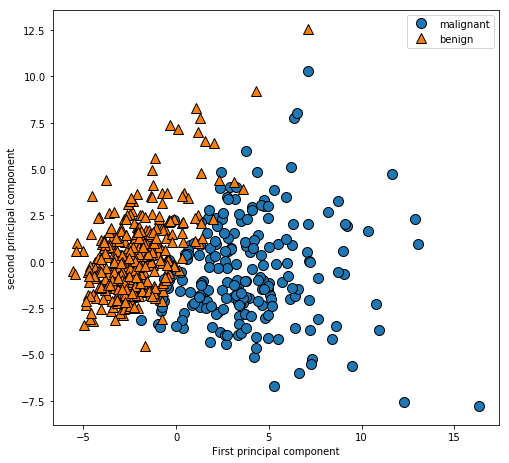

In [41]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('second principal component')

Text(0, 0.5, 'Principal component')

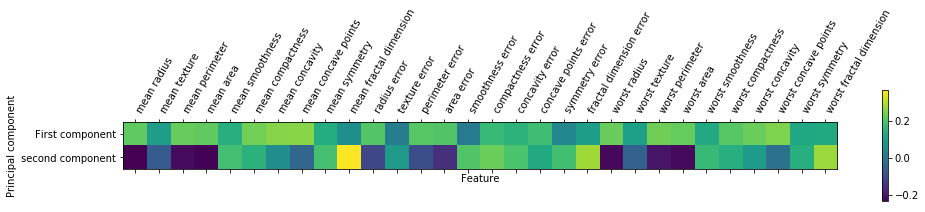

In [52]:
# 利用热图将主成分系数可视化
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['First component', 'second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal component')

Text(0, 0.5, 'second principal component')

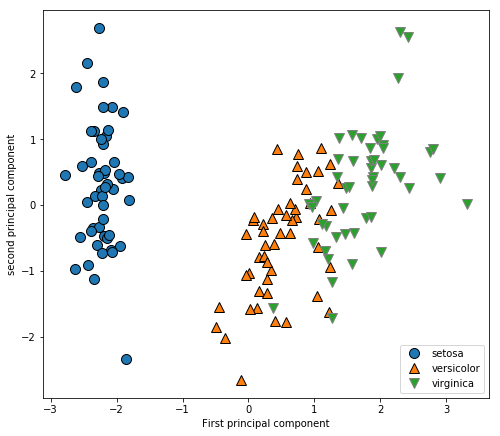

In [62]:
from sklearn.datasets import load_iris

iris = load_iris()
scaler = StandardScaler().fit(iris.data)  # 方法链
X_scaler = scaler.transform(iris.data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaler)
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], iris.target)
plt.legend(iris.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('second principal component')

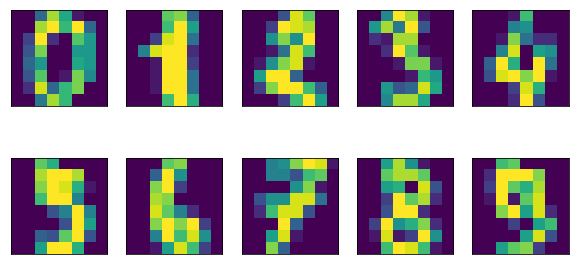

In [64]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

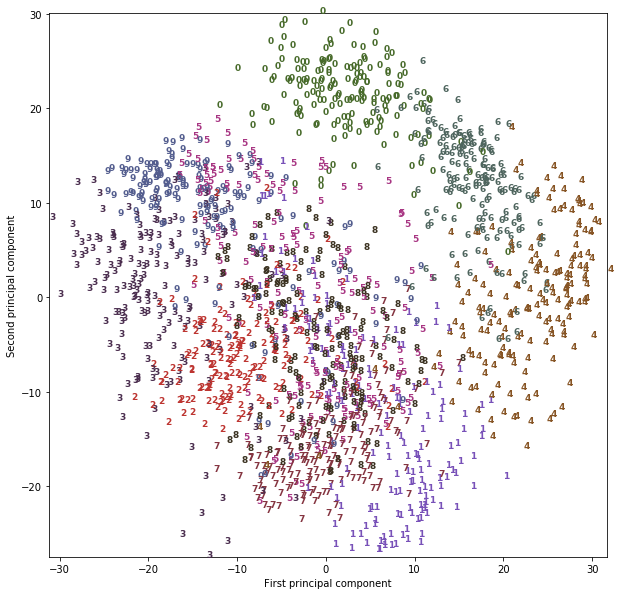

In [69]:
# PCA数据可视化
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
          '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 将数据绘制成文本
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

Text(0, 0.5, 'Second principal component')

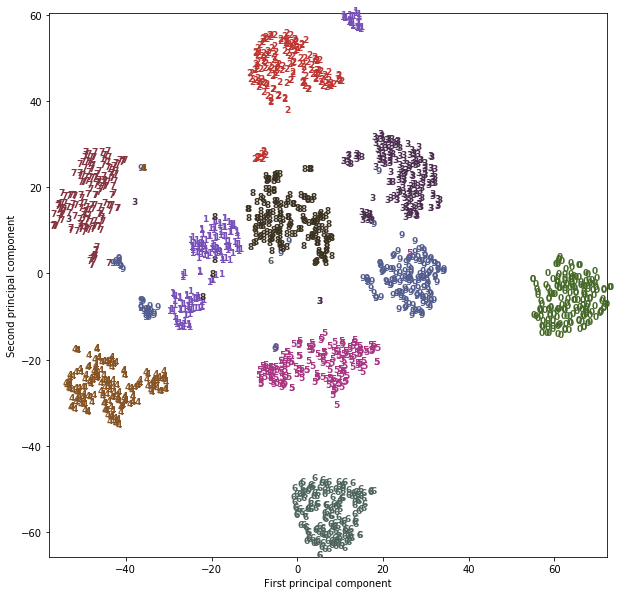

In [72]:
from sklearn.manifold import TSNE  # 用t-SNE进行流行学习，用于数据可视化，不支持变换数据，所以没有transform，但有fit_transform

tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    # 将数据绘制成文本
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [80]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print('cluster memberships:\n{}'.format(kmeans.labels_))
print('predict:\n{}'.format(kmeans.predict(X)))
print(kmeans.cluster_centers_)  # 簇中心保存在cluster_centers_属性中

cluster memberships:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]
predict:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]
[[ -1.4710815    4.33721882]
 [-10.04935243  -3.85954095]
 [ -6.58196786  -8.17239339]]


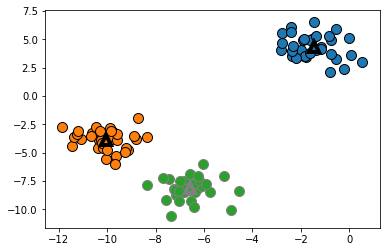

In [82]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
                         markers='^', markeredgewidth=4)  

Text(0, 0.5, 'Feature 1')

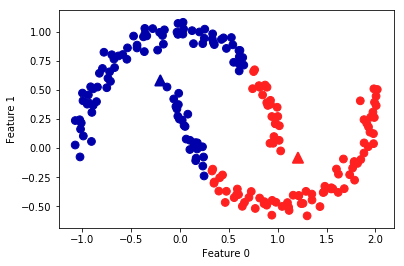

In [87]:
# K均值无法识别复杂形状的簇
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^',
            c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

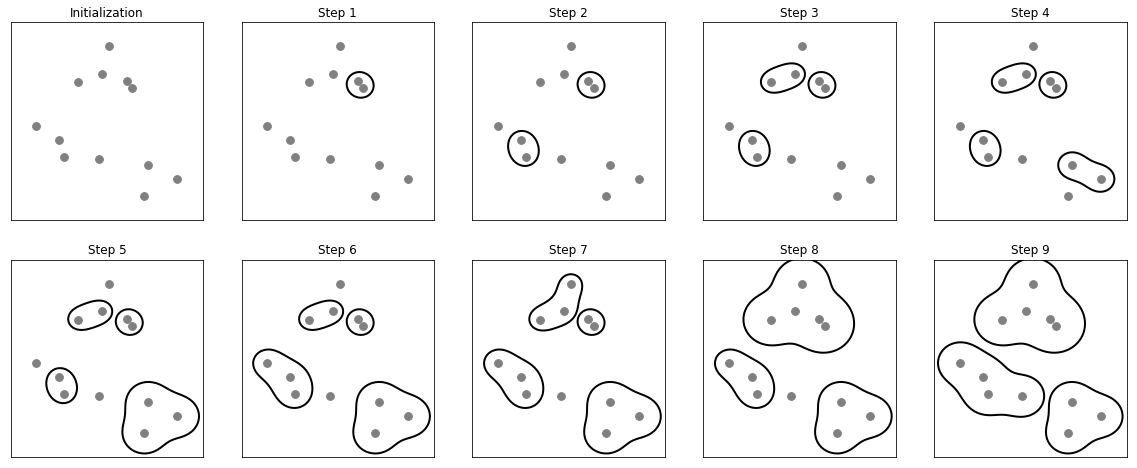

In [88]:
# PCA试图找到数据中方差最大的方向，NMF试图找到累加的分量，KMeans可以看作一种分解方法，其中每个点用单一分量表示，这种观点叫矢量量化
# 凝聚聚类
mglearn.plots.plot_agglomerative_algorithm()

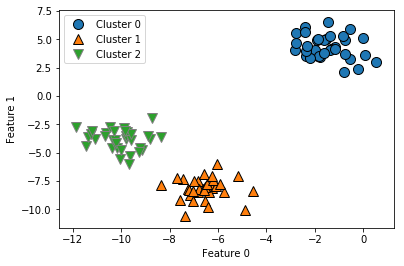

In [94]:
from sklearn.cluster import AgglomerativeClustering  # 凝聚聚类仍然无法分离像two_moons数据集这样复杂的形状
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)  # agglomerativeClustering没有predict方法，但有fit_predict方法
# agg.fit(X)
# assignment = agg.labels_  等价于assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])

Text(0, 0.5, 'Feature 1')

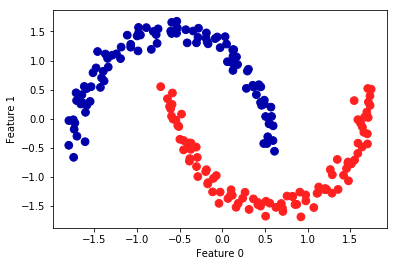

In [106]:
from sklearn.cluster import DBSCAN  # 具有噪声的基于密度的空间聚类应用
X, y =make_moons(noise=0.05, n_samples=200, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

dbscan = DBSCAN()  # 参数eps默认0.5,隐式控制簇的个数，min_samples决定簇的最小尺寸 
clusters = dbscan.fit_predict(X_scaler)  # 也不允许对新的测试数据进行预测
plt.scatter(X_scaler[:, 0], X_scaler[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

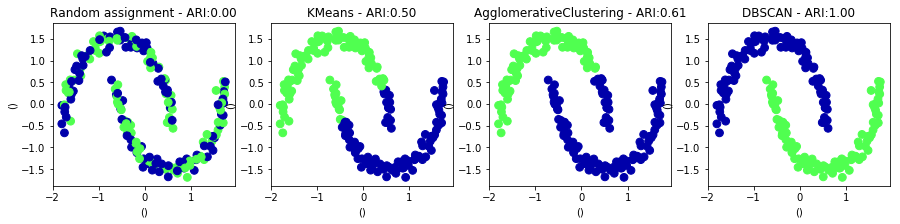

In [126]:
# 用真实值评估聚类
from sklearn.metrics.cluster import adjusted_rand_score  # 调整rand指数(ARI)
# form sklearn.metrics import accuracy_score  不可以评估聚类

X, y = make_moons(n_samples=200, noise=.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

fig,axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xlabel': (), 'ylabel': ()})
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 创建一个随机的簇分配作为参考
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X_scaler))

# 绘制随机分配
axes[0].scatter(X_scaler[:, 0], X_scaler[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title('Random assignment - ARI:{:.2f}'.format(
    adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaler)
    ax.scatter(X_scaler[:, 0], X_scaler[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title('{} - ARI:{:.2f}'.format(algorithm.__class__.__name__,
                                          adjusted_rand_score(y, clusters)))

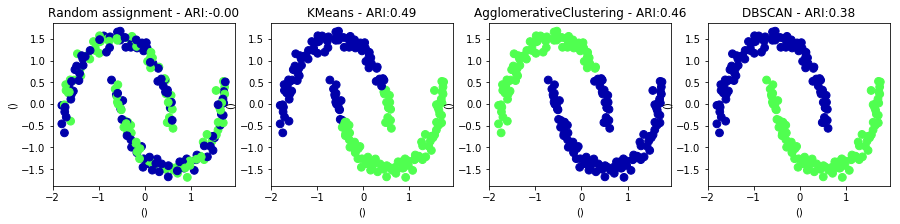

In [131]:
# 用真实值评估聚类
from sklearn.metrics.cluster import silhouette_score  # 轮廓系数，在实践中的效果并不好
# form sklearn.metrics import accuracy_score  不可以评估聚类

X, y = make_moons(n_samples=200, noise=.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaler = scaler.transform(X)

fig,axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xlabel': (), 'ylabel': ()})
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 创建一个随机的簇分配作为参考
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 绘制随机分配
axes[0].scatter(X_scaler[:, 0], X_scaler[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title('Random assignment - ARI:{:.2f}'.format(
    silhouette_score(X_scaler, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaler)
    ax.scatter(X_scaler[:, 0], X_scaler[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title('{} - ARI:{:.2f}'.format(algorithm.__class__.__name__,
                                          silhouette_score(X_scaler, clusters)))